In [87]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
def read_data():
    df = pd.read_csv("../tests/results/scalability_n_20240903-112414.csv", index_col=0)    
    return df

def read_data_k():
    df = pd.read_csv("../tests/results/scalability_k_20240903-174943.csv", index_col=0)    
    return df

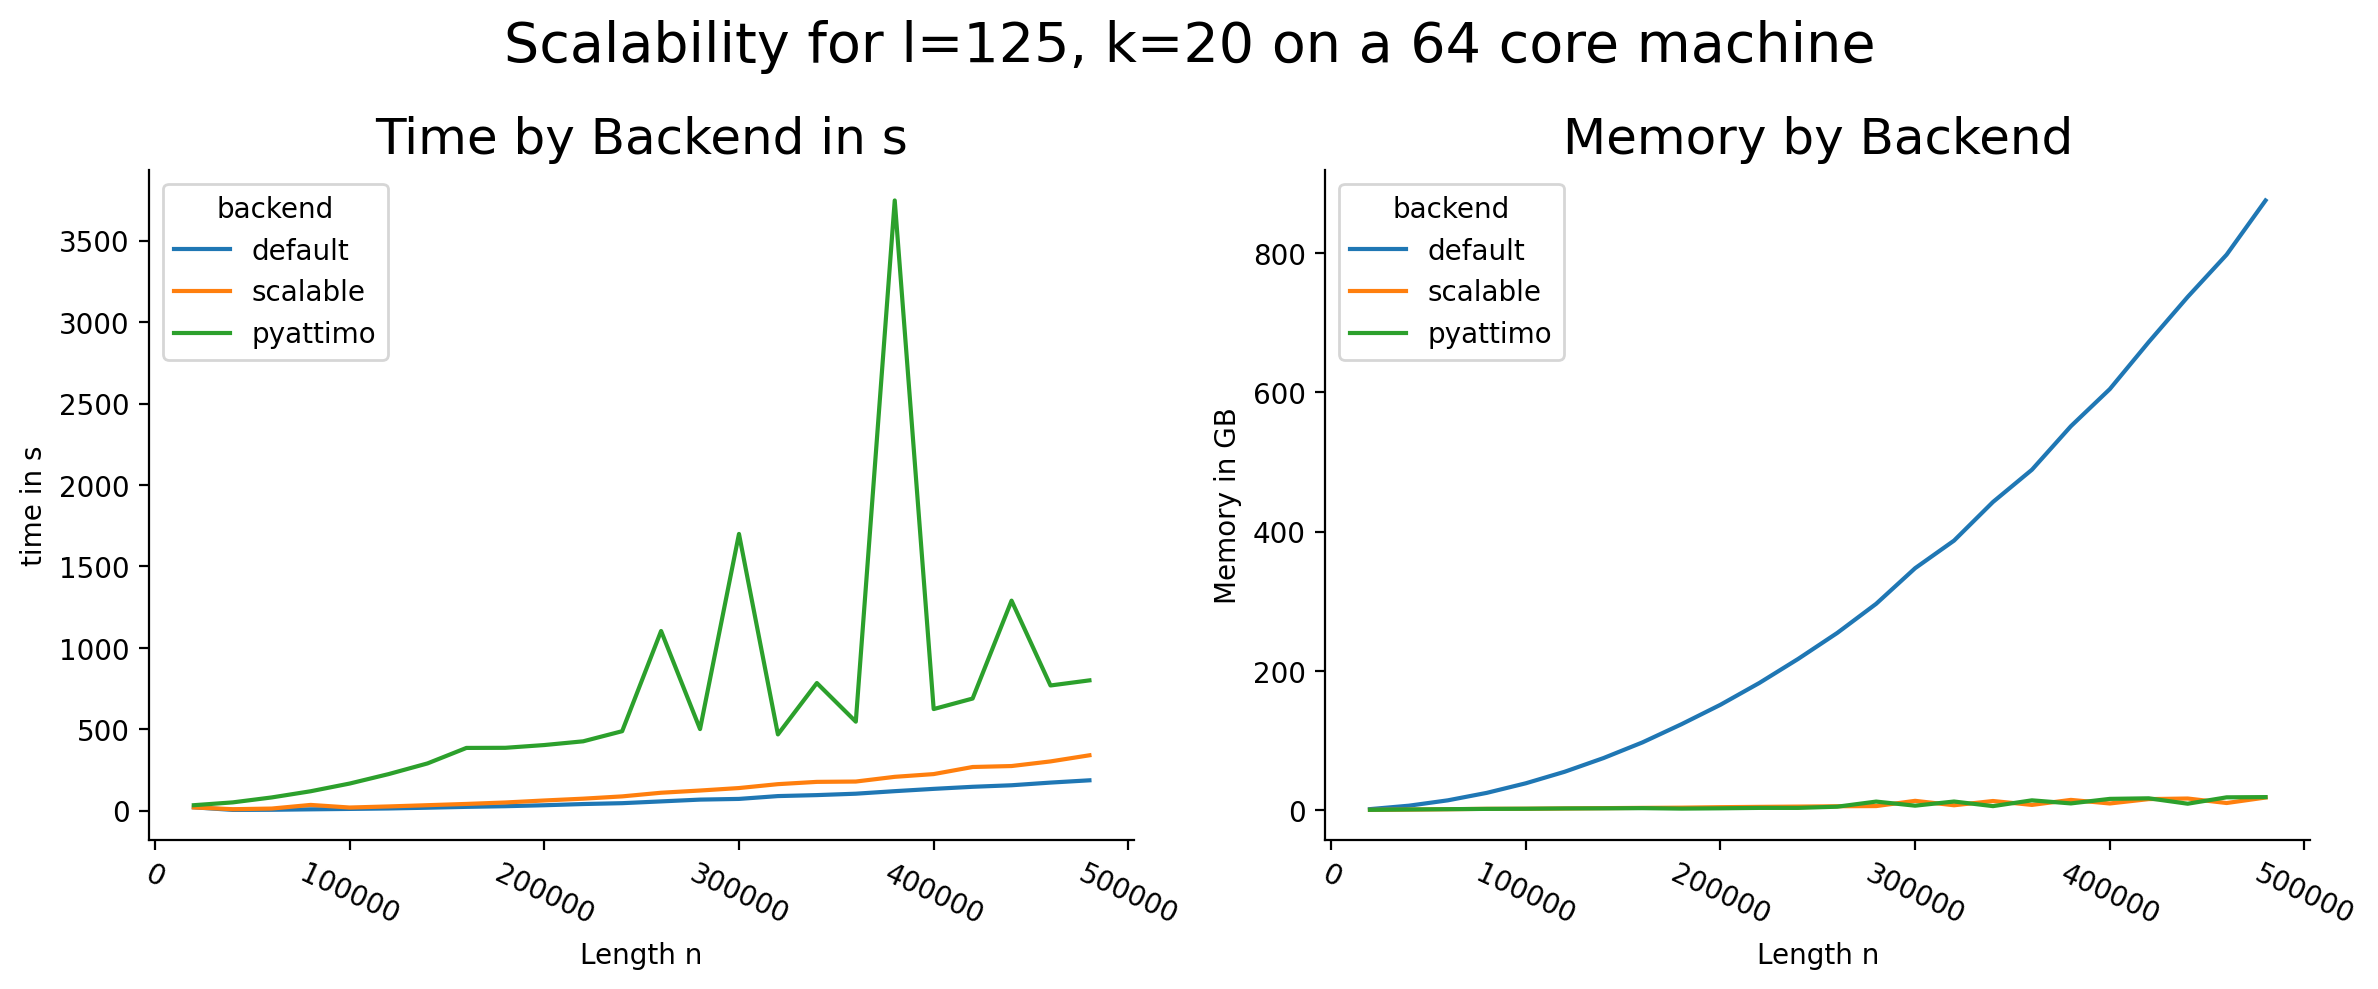

In [180]:
df = read_data()

df.index = df.index*2
df["memory in MB"] = df["memory in MB"] / 1024

mask = df.backend=="default"
subset = df[mask] 

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x=df.index, hue=df.backend, y=df["time in s"], ax=axes[0])
axes[0].set_title("Time by Backend in s", fontsize=18)
axes[0].tick_params(axis='x', labelrotation=-25)
axes[0].set_xlabel("Length n")

plt.yticks(fontsize=10)
plt.ylabel("Time in s")
sns.despine()

sns.lineplot(x=df.index, hue=df.backend, y=df["memory in MB"], ax=axes[1])
axes[1].set_title("Memory by Backend", fontsize=18)
axes[1].tick_params(axis='x', labelrotation=-25)
axes[1].set_xlabel("Length n")
axes[1].set_ylabel("Memory in GB")

plt.yticks(fontsize=10)
sns.despine()

plt.suptitle("Scalability for l=125, k=20 on a 64 core machine", fontsize=20)
plt.tight_layout()
plt.savefig("../tests/results/images/scalability_n.pdf")

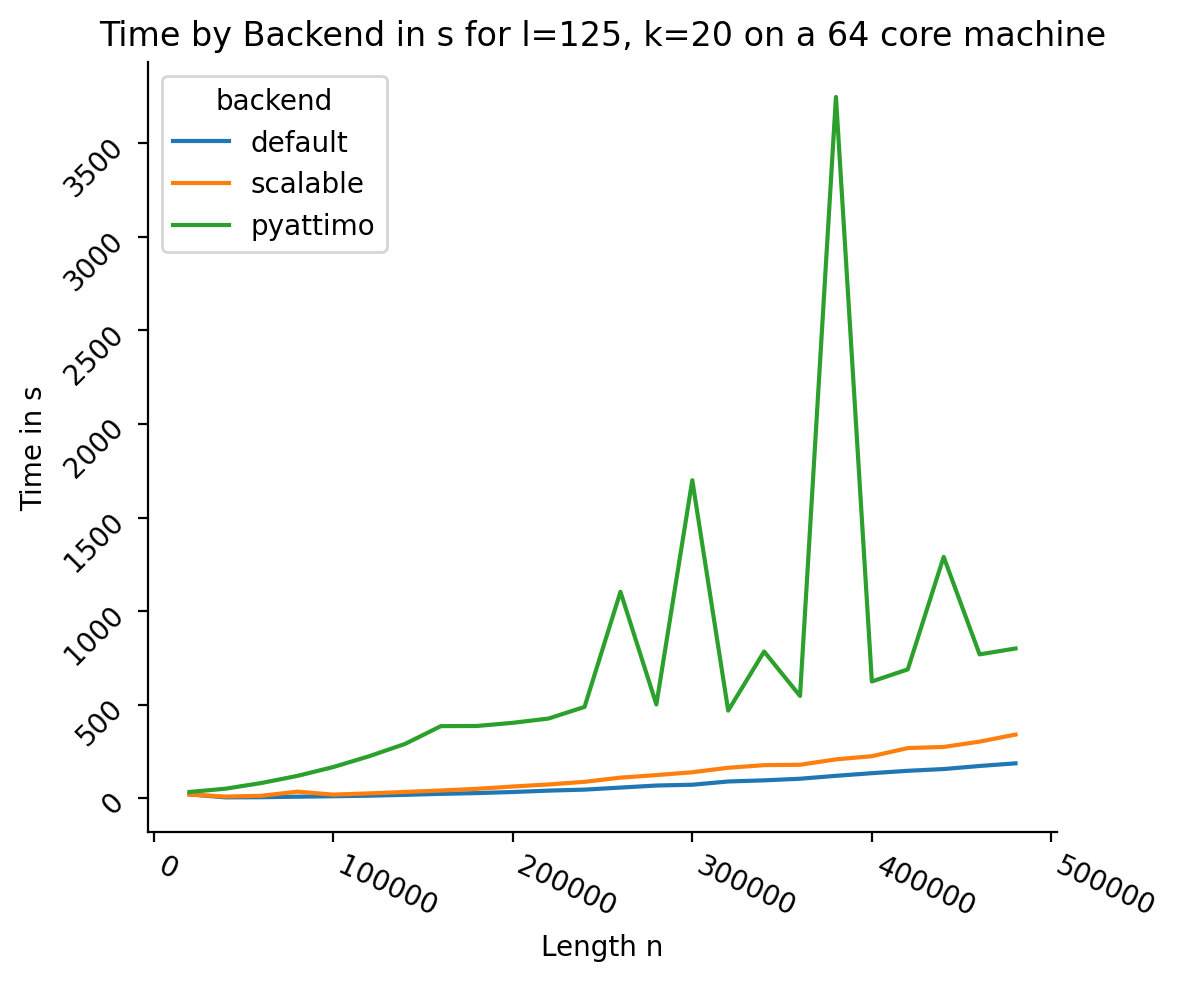

In [179]:
df = read_data()

df.index = df.index*2
# df = df[(df.backend == "default") | (df.backend == "scalable")]

fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(x=df.index, hue=df.backend, y=df["time in s"], ax=axes)
axes.set_title("Time by Backend in s for l=125, k=20 on a 64 core machine", fontsize=12)
axes.tick_params(labelrotation=45)
# axes.set_yscale('log')
#axes.set_xscale('log')


plt.yticks(fontsize=10)
plt.xticks(rotation=-25, fontsize=10, ha='left')
plt.xlabel("Length n")
plt.ylabel("Time in s")
sns.despine()

plt.tight_layout()
plt.savefig("../tests/results/images/scalability_n_runtime.pdf")

In [144]:
n = (380_000 ** 2) * 4 / (1024 * 1024 * 1024)
n


537.9319190979004

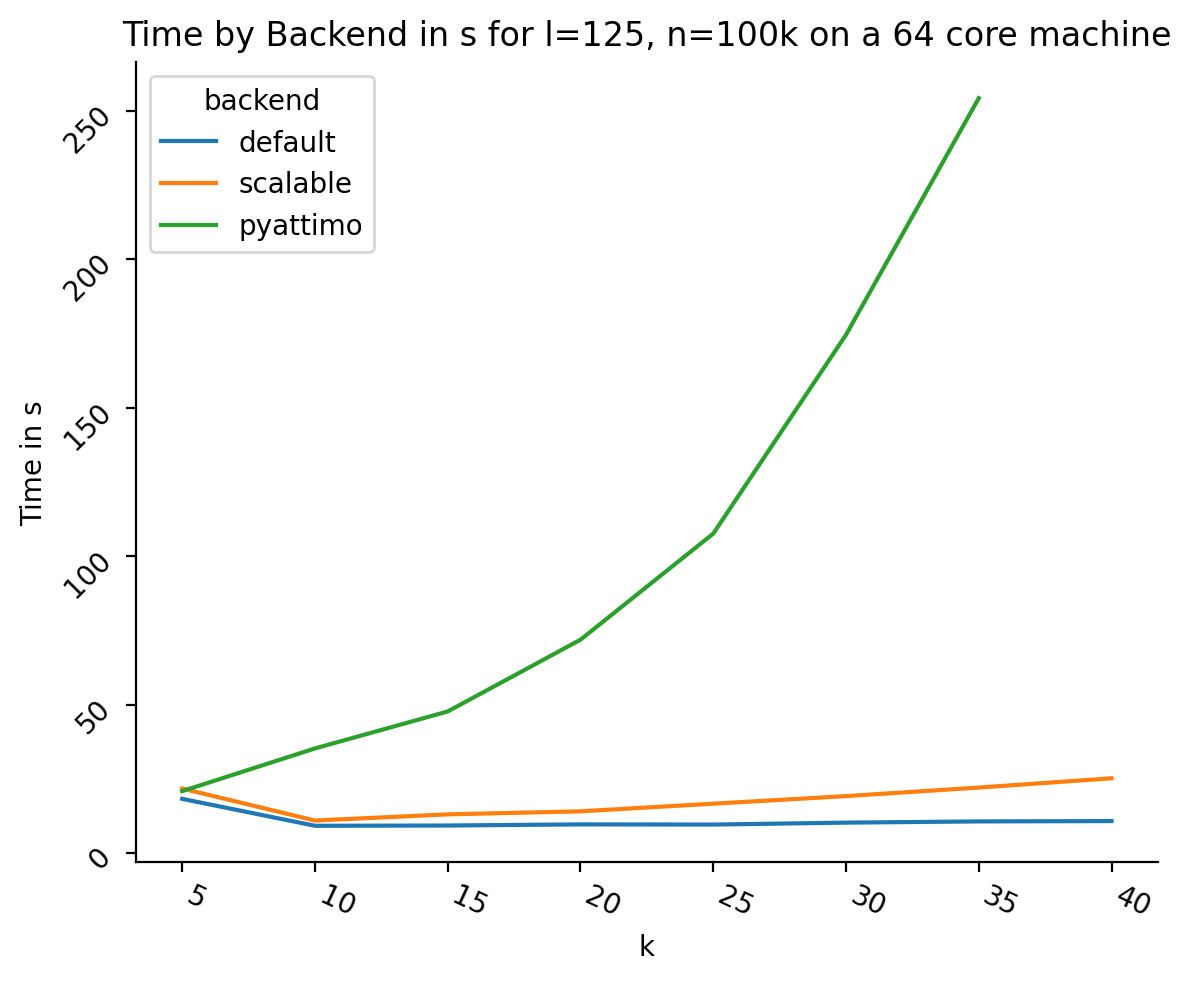

In [183]:
df = read_data_k()
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(x=df.index, hue=df.backend, y=df["time in s"], ax=axes)
axes.set_title("Time by Backend in s for l=125, n=100k on a 64 core machine", fontsize=12)
axes.tick_params(labelrotation=45)
# axes.set_yscale('log')
#axes.set_xscale('log')


plt.yticks(fontsize=10)
plt.xticks(rotation=-25, fontsize=10, ha='left')
plt.xlabel("k")
plt.ylabel("Time in s")
sns.despine()

plt.tight_layout()
plt.savefig("../tests/results/images/scalability_k_runtime.pdf")